In [10]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn import metrics

loan_data = pd.read_csv("loan_data.csv")
loan_data.head(20)

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0               1  debt_consolidation    0.1189       829.10       11.350407   
1               1         credit_card    0.1071       228.22       11.082143   
2               1  debt_consolidation    0.1357       366.86       10.373491   
3               1  debt_consolidation    0.1008       162.34       11.350407   
4               1         credit_card    0.1426       102.92       11.299732   
5               1         credit_card    0.0788       125.13       11.904968   
6               1  debt_consolidation    0.1496       194.02       10.714418   
7               1           all_other    0.1114       131.22       11.002100   
8               1    home_improvement    0.1134        87.19       11.407565   
9               1  debt_consolidation    0.1221        84.12       10.203592   
10              1  debt_consolidation    0.1347       360.43       10.434116   
11              1  debt_consolidation    0.1324       253.58       11.835009   
12              1  debt_consolidation    0.0859       316.11       10.933107   
13              1      small_business    0.0714        92.82       11.512925   
14              1  debt_consolidation    0.0863       209.54        9.487972   
15              1      major_purchase    0.1103       327.53       10.738915   
16              1           all_other    0.1317        77.69       10.522773   
17              1         credit_card    0.0894       476.58       11.608236   
18              1  debt_consolidation    0.1039       584.12       10.491274   
19              1      major_purchase    0.1513       173.65       11.002100   

      dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0   19.48   737        5639.958333      28854        52.1               0   
1   14.29   707        2760.000000      33623        76.7               0   
2   11.63   682        4710.000000       3511        25.6               1   
3    8.10   712        2699.958333      33667        73.2               1   
4   14.97   667        4066.000000       4740        39.5               0   
5   16.98   727        6120.041667      50807        51.0               0   
6    4.00   667        3180.041667       3839        76.8               0   
7   11.08   722        5116.000000      24220        68.6               0   
8   17.25   682        3989.000000      69909        51.1               1   
9   10.00   707        2730.041667       5630        23.0               1   
10  22.09   677        6713.041667      13846        71.0               2   
11   9.16   662        4298.000000       5122        18.2               2   
12  15.49   767        6519.958333       6068        16.7               0   
13   6.50   747        4384.000000       3021         4.8               0   
14   9.73   727        1559.958333       6282        44.6               0   
15  13.04   702        8159.958333       5394        53.4               1   
16   2.26   672        3895.958333       2211        88.4               0   
17   7.07   797        6510.958333       7586        52.7               1   
18   3.80   712        2760.000000       8311        59.8               0   
19   2.74   667        1126.958333        591        84.4               3   

    delinq.2yrs  pub.rec  not.fully.paid  
0             0        0               0  
1             0        0               0  
2             0        0               0  
3             0        0               0  
4             1        0               0  
5             0        0               0  
6             0        1               1  
7             0        0               1  
8             0        0               0  
9             0        0               0  
10            0        1               0  
11            1        0               0  
12            0        0               0  
13            1        0               0  
14            0        0               0  
15            0  

## Data dictionary

|    | Variable          | Explanation                                                                                                             |
|---:|:------------------|:------------------------------------------------------------------------------------------------------------------------|
|  0 | credit_policy     | 1 if the customer meets the credit underwriting criteria; 0 otherwise.                                                  |
|  1 | purpose           | The purpose of the loan.                                                                                                |
|  2 | int_rate          | The interest rate of the loan (more risky borrowers are assigned higher interest rates).                                |
|  3 | installment       | The monthly installments owed by the borrower if the loan is funded.                                                    |
|  4 | log_annual_inc    | The natural log of the self-reported annual income of the borrower.                                                     |
|  5 | dti               | The debt-to-income ratio of the borrower (amount of debt divided by annual income).                                     |
|  6 | fico              | The FICO credit score of the borrower.                                                                                  |
|  7 | days_with_cr_line | The number of days the borrower has had a credit line.                                                                  |
|  8 | revol_bal         | The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).                           |
|  9 | revol_util        | The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available). |
| 10 | inq_last_6mths    | The borrower's number of inquiries by creditors in the last 6 months.                                                   |
| 11 | delinq_2yrs       | The number of times the borrower had been 30+ days past due on a payment in the past 2 years.                           |
| 12 | pub_rec           | The borrower's number of derogatory public records.                                                                     |
| 13 | not_fully_paid    | 1 if the loan is not fully paid; 0 otherwise.   

[Source](https://www.kaggle.com/itssuru/loan-data) of dataset.

### Generate correlation matrix 


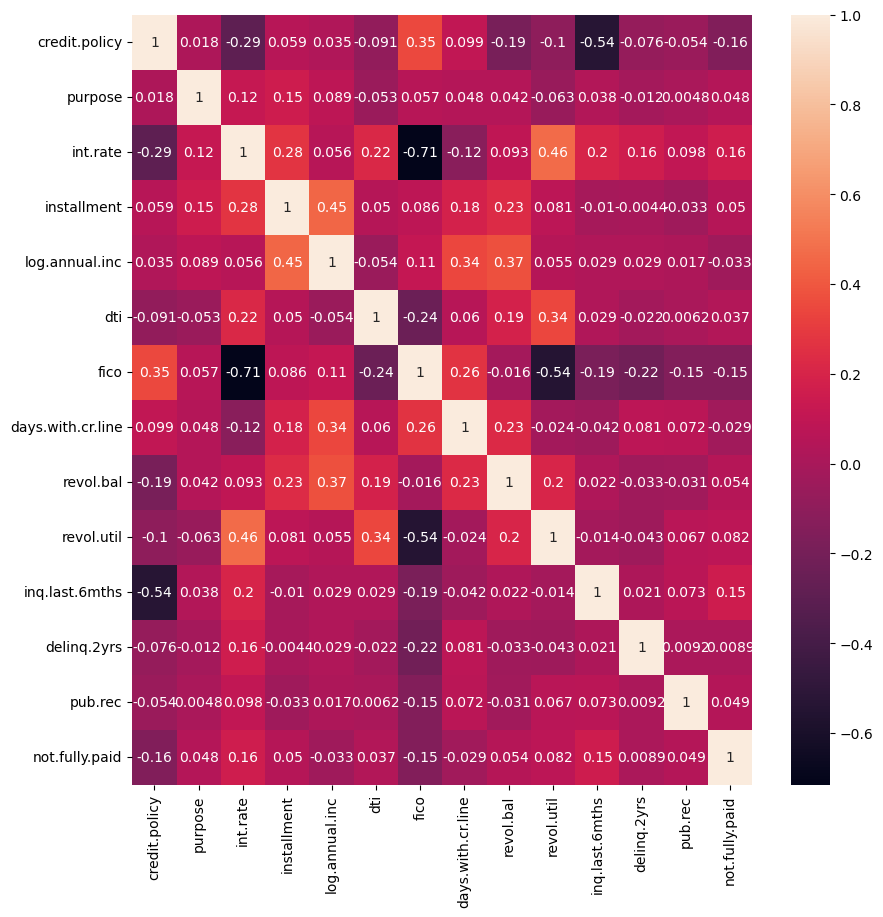

In [49]:
corr_data = loan_data.corr()
fig, ax = plt.subplots(figsize=(10,10))
sn.heatmap(corr_data, annot=True, ax=ax)
plt.savefig('correlation.png')
plt.show()

In [12]:
le = LabelEncoder()

In [20]:
model_data = loan_data
model_data['purpose'] = le.fit_transform(model_data.purpose)
model_data.head()


credit.policy  purpose  int.rate  installment  log.annual.inc    dti  fico  \
0              1        2    0.1189       829.10       11.350407  19.48   737   
1              1        1    0.1071       228.22       11.082143  14.29   707   
2              1        2    0.1357       366.86       10.373491  11.63   682   
3              1        2    0.1008       162.34       11.350407   8.10   712   
4              1        1    0.1426       102.92       11.299732  14.97   667   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0        5639.958333      28854        52.1               0            0   
1        2760.000000      33623        76.7               0            0   
2        4710.000000       3511        25.6               1            0   
3        2699.958333      33667        73.2               1            0   
4        4066.000000       4740        39.5               0            1   

   pub.rec  not.fully.paid  
0        0               0  
1        0               0  
2        0               0  
3        0               0  
4        0               0

#### split data into test and train datasets

In [38]:
X = model_data.drop(columns = 'not.fully.paid')
y = model_data['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Oversample unpaid loans for better identification

In [39]:
rus = RandomUnderSampler()
ros = RandomOverSampler()
scaler = StandardScaler()
X_res, y_res = ros.fit_resample(X_train, y_train)
X_rus, y_rus = rus.fit_resample(X_train, y_train)
X_train_scaled = scaler.fit_transform(X_res)
X_test_scaled = scaler.fit_transform(X_test)

#### Train Logistic Regression Model 


In [40]:
model = DecisionTreeRegressor()
modelLR = LogisticRegression(C=1, penalty="l1",  solver="saga")
modelLR.fit(X_train_scaled, y_res)
model.fit(X_train_scaled, y_res)
prediction = modelLR.predict(X_test_scaled)

#### Check Accuracy of Model

In [48]:
prediction = modelLR.predict(X_test_scaled)
predictionDTC = model.predict(X_test_scaled)
score = modelLR.score(X_test_scaled, y_test)
score

0.5600208768267223

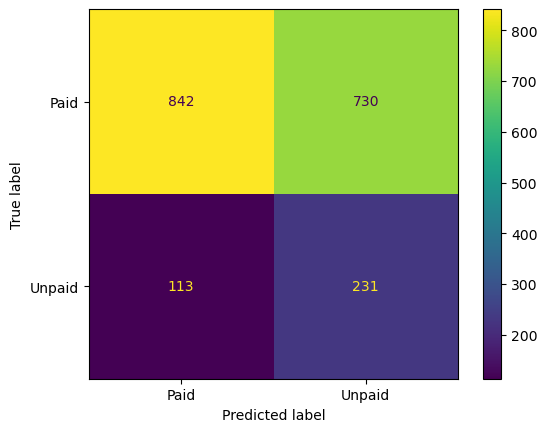

In [46]:
cm = metrics.confusion_matrix(y_test, prediction)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Paid', 'Unpaid'])
cm_display.plot()
cm_display.figure_.savefig('confusion_matrix.png')